In [2]:
import pandas as pd
df = pd.read_csv('winequality-red.csv')

In [8]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [4]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [5]:
quality_mapping = {
    3:0,
    4:1,
    5:2,
    6:3,
    7:4,
    8:5
}

df.loc[:, "quality"] = df.quality.map(quality_mapping)

In [7]:
df = df.sample(frac = 1).reset_index(drop = True)
df_train = df.head(1000)

df_test = df.tail(599)

In [9]:
from sklearn import tree
from sklearn import metrics

clf = tree.DecisionTreeClassifier(max_depth = 3)

cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

clf.fit(df_train[cols], df_train.quality)

DecisionTreeClassifier(max_depth=3)

In [10]:
train_pred = clf.predict(df_train[cols])
test_pred = clf.predict(df_test[cols])

train_accuracy = metrics.accuracy_score(df_train.quality, train_pred)

test_accuracy = metrics.accuracy_score(df_test.quality, test_pred)

In [11]:
train_accuracy

0.584

In [12]:
test_accuracy

0.5425709515859767

In [13]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
matplotlib.rc('xtick', labelsize = 20)
matplotlib.rc('ytick', labelsize = 20)

%matplotlib inline

train_accuracies = [0.5]
test_accuracies = [0.5]

for depth in range(1, 25):
    clf = tree.DecisionTreeClassifier(max_depth = depth)
    clf.fit(df_train[cols], df_train.quality)
    
    train_pred = clf.predict(df_train[cols])
    test_pred = clf.predict(df_test[cols])
    
    train_acc = metrics.accuracy_score(df_train.quality, train_pred)
    test_acc = metrics.accuracy_score(df_test.quality, test_pred)
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    

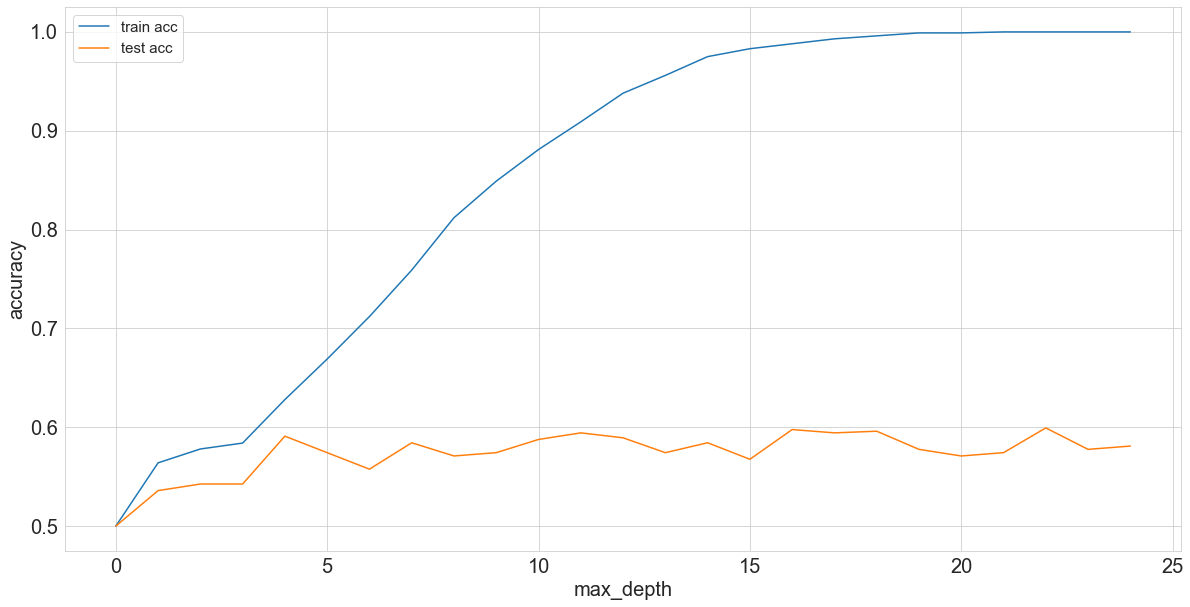

In [18]:
plt.figure(figsize = (20,10))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label = "train acc")
plt.plot(test_accuracies, label = "test acc")
plt.legend(loc = "upper left" , prop = {'size': 15})
plt.xticks(range(0, 26, 5))
plt.xlabel("max_depth", size = 20)
plt.ylabel("accuracy", size = 20)
plt.show()


Text(0, 0.5, 'count')

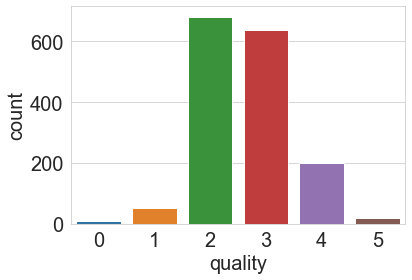

In [19]:
b = sns.countplot(x = 'quality', data = df)
b.set_xlabel("quality", fontsize = 20)
b.set_ylabel("count", fontsize = 20)
